In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Olymplic_medals_table.csv")
data.rename(columns={'Total':'Total_Medals'}, inplace = True)
data.head(10)


# Summer or Winter
data['Better_Event']=np.where(data['Total_Summer']>data['Total_Winter'],'Summer','Winter')
data['Better_Event'] =np.where(data['Total_Summer'] ==data['Total_Winter'],'Both',data['Better_Event'])
better_event=data['Better_Event'].value_counts().index.values[0]




In [3]:
# Top 10
top_countries=data[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']]
top_countries=top_countries[:-1]


def top_ten(df,col):
    country_list= list((df.nlargest(10,col)['Country_Name']))
    return country_list

top_10_summer=top_ten(top_countries,'Total_Summer')
top_10_winter=top_ten(top_countries,'Total_Winter')
top_10=top_ten(top_countries,'Total_Medals')

common=[x for x in top_10_summer if x in top_10_winter and x in top_10]



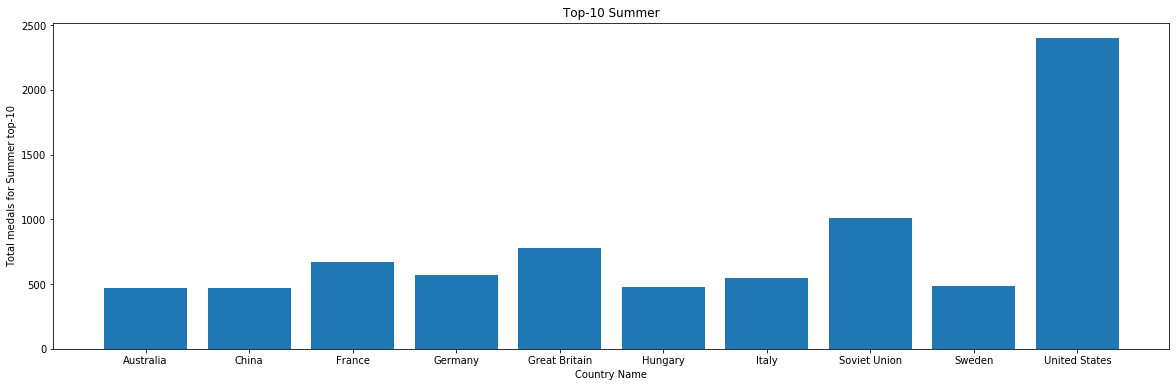

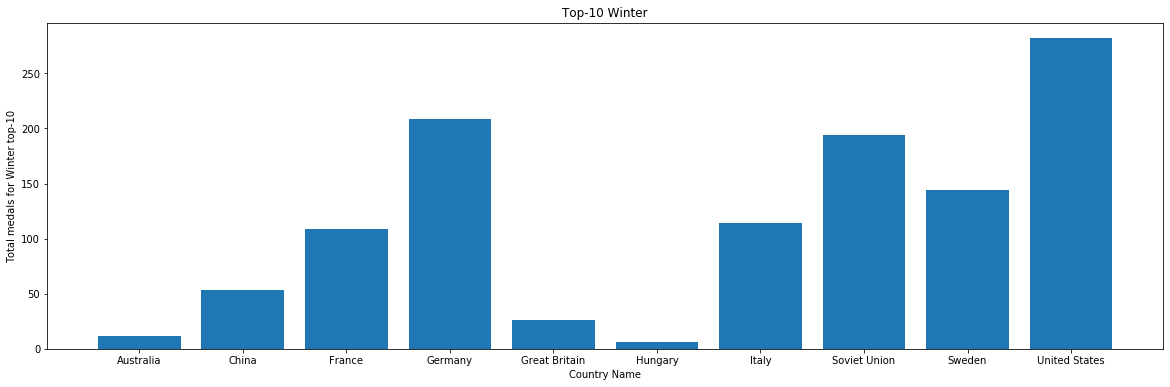

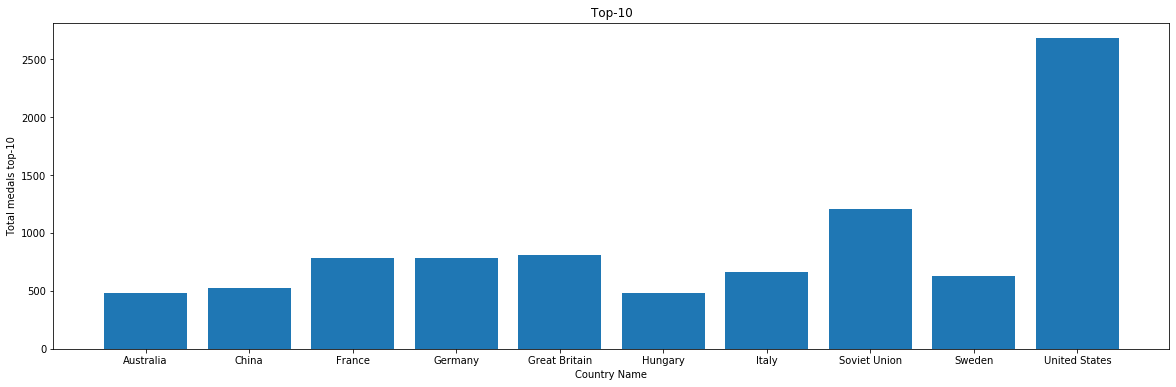

In [4]:
# Plotting top 10
summer_df= data[data['Country_Name'].isin(top_10_summer)]

plt.figure(figsize=(20, 6))
plt.bar(summer_df['Country_Name'], summer_df['Total_Summer'])
plt.xlabel('Country Name')
plt.ylabel('Total medals for Summer top-10')
plt.title('Top-10 Summer')
plt.show()

winter_df= data[data['Country_Name'].isin(top_10_winter)]

plt.figure(figsize=(20, 6))
plt.bar(summer_df['Country_Name'], summer_df['Total_Winter'])
plt.xlabel('Country Name')
plt.ylabel('Total medals for Winter top-10')
plt.title('Top-10 Winter')
plt.show()

top_df= data[data['Country_Name'].isin(top_10)]

plt.figure(figsize=(20, 6))
plt.bar(summer_df['Country_Name'], summer_df['Total_Medals'])
plt.xlabel('Country Name')
plt.ylabel('Total medals top-10')
plt.title('Top-10')
plt.show()





In [5]:
# Top Performing Countries
summer_df['Golden_Ratio']=summer_df['Gold_Summer']//summer_df['Total_Summer']
summer_country_gold=summer_df.loc[summer_df['Golden_Ratio'].idxmax(),'Country_Name']

winter_df['Golden_Ratio']=winter_df['Gold_Winter']//winter_df['Total_Winter']
winter_country_gold=winter_df.loc[winter_df['Golden_Ratio'].idxmax(),'Country_Name']

top_df['Golden_Ratio']=top_df['Gold_Total']//top_df['Total_Medals']
top_max_ratio=max(top_df['Golden_Ratio'])
top_country_gold=top_df.loc[top_df['Golden_Ratio'].idxmax(),'Country_Name']




C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [6]:
# Best in the world 
data_1=data[:-1]
data_1['Total_Points']= data_1['Gold_Total']*3 + data_1['Silver_Total']*2 + data_1['Bronze_Total']*1  
most_points=max(data_1['Total_Points'])
best_country=data_1.loc[data_1['Total_Points'].idxmax(),'Country_Name']
print('Best Country: ', best_country)



Best Country:  United States


C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


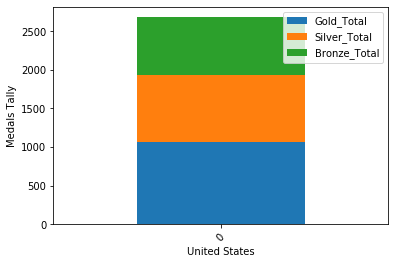

In [7]:
# Plotting the best
best=data[data['Country_Name']==best_country]
best.reset_index(drop = True, inplace = True)
best=best[['Gold_Total','Silver_Total','Bronze_Total']]

best.plot.bar(stacked=True)
plt.xlabel('United States')
plt.ylabel('Medals Tally')
plt.xticks(rotation=45)
plt.show()

